# read

In [1]:
import numpy as np
import pandas as pd

In [2]:
data1 = pd.read_csv("./data/process-I.csv")
data2 = pd.read_csv("./data/process-II.csv")

In [3]:
data1.head()

,Unnamed: 0,Station_Id_C,Lat,Lon,Alti,Year,Mon,Day,Hour,Snow_Depth,...,PRE_1h,CLO_Cov,WIN_S_Avg_2mi,WIN_D_Avg_2mi,WEP_Now,DICED3h,WBT,AH,u,v
0,1,57741,27.7303,109.1769,340.2,2024,2,5,0,NaN,...,0.033333,41.0,1.818850,56.770449,11,0,-0.462829,4.396671,-1.521435,-0.996720
1,2,57767,27.1264,111.0064,308.4,2024,2,4,0,NaN,...,0.500000,100.0,0.481396,291.891386,1,3,-0.113969,4.772198,0.446684,-0.179488
2,3,57767,27.1264,111.0064,308.4,2024,2,4,3,NaN,...,0.533333,100.0,0.253557,312.006645,11,-3,0.451335,4.962142,0.188410,-0.169685
3,4,57767,27.1264,111.0064,308.4,2024,2,5,3,NaN,...,0.000000,100.0,1.895731,275.368271,6,0,0.270063,4.867198,1.887417,-0.177359
4,5,57767,27.1264,111.0064,308.4,2024,2,6,0,NaN,...,0.100000,96.0,0.307228,239.601444,1,2,-0.080614,4.783192,0.264993,0.155461


In [4]:
data2.head()

,Unnamed: 0,Station_Id_C,Lat,Lon,Alti,Year,Mon,Day,Hour,Snow_Depth,...,PRE_1h,CLO_Cov,WIN_S_Avg_2mi,WIN_D_Avg_2mi,WEP_Now,DICED3h,WBT,AH,u,v
0,1,58223,32.8003,117.9892,34.0,2024,2,21,6,NaN,...,0.2,66.666667,3.699899,353.868450,3,0,-2.162109,3.883164,0.395192,-3.678733
1,2,58223,32.8003,117.9892,34.0,2024,2,21,9,NaN,...,0.0,66.666667,3.988442,350.788820,11,0,-2.282606,3.880391,0.638445,-3.937011
2,3,58223,32.8003,117.9892,34.0,2024,2,21,12,NaN,...,0.0,15.333333,4.286204,1.766073,0,0,-2.626227,3.653952,-0.132096,-4.284168
3,4,58223,32.8003,117.9892,34.0,2024,2,21,15,NaN,...,0.0,32.000000,4.145907,358.657946,0,0,-2.658163,3.716582,0.097102,-4.144770
4,5,58223,32.8003,117.9892,34.0,2024,2,22,0,NaN,...,0.0,65.000000,3.457979,9.879444,0,0,-4.417710,3.026336,-0.593305,-3.406700


In [5]:
df = pd.concat([data1, data2])

In [6]:
sd = df['Snow_Depth'].dropna()

In [7]:
sd

41      2.0
47      7.0
213     1.0
355     5.0
374     5.0
       ... 
2799    6.0
2805    8.0
2815    1.0
2821    1.0
2828    1.0
Name: Snow_Depth, Length: 141, dtype: float64

In [8]:
df.dtypes

Unnamed: 0         int64
Station_Id_C       int64
Lat              float64
Lon              float64
Alti             float64
Year               int64
Mon                int64
Day                int64
Hour               int64
Snow_Depth       float64
WEP_WSET         float64
EICED              int64
PRS              float64
PRS_sea          float64
TEM              float64
GST_5cm          float64
GST              float64
LGST             float64
DPT              float64
RHU              float64
VAP              float64
Snow_Depth.1     float64
PRE_1h           float64
CLO_Cov          float64
WIN_S_Avg_2mi    float64
WIN_D_Avg_2mi    float64
WEP_Now            int64
DICED3h            int64
WBT              float64
AH               float64
u                float64
v                float64
dtype: object

In [9]:
df.rename(columns={'Year': 'year', 'Mon': 'month', 'Day': 'day', 'Hour': 'hour'}, inplace=True)
df['Datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('Datetime', inplace=True)

In [16]:
df['EICED'] -= 27

In [17]:
station_counts = df.groupby('Station_Id_C')['Station_Id_C'].transform('count')
df_filtered = df[station_counts >= 2]

In [18]:
df_filtered.to_csv("./data/process.csv")

In [19]:
df_filtered

,Unnamed: 0,Station_Id_C,Lat,Lon,Alti,year,month,day,hour,Snow_Depth,...,PRE_1h,CLO_Cov,WIN_S_Avg_2mi,WIN_D_Avg_2mi,WEP_Now,DICED3h,WBT,AH,u,v
Datetime,,,,,,,,,,,,,,,,,,,,,
2024-02-04 00:00:00,2,57767,27.1264,111.0064,308.4,2024,2,4,0,NaN,...,0.500000,100.000000,0.481396,291.891386,1,3,-0.113969,4.772198,0.446684,-0.179488
2024-02-04 03:00:00,3,57767,27.1264,111.0064,308.4,2024,2,4,3,NaN,...,0.533333,100.000000,0.253557,312.006645,11,-3,0.451335,4.962142,0.188410,-0.169685
2024-02-05 03:00:00,4,57767,27.1264,111.0064,308.4,2024,2,5,3,NaN,...,0.000000,100.000000,1.895731,275.368271,6,0,0.270063,4.867198,1.887417,-0.177359
2024-02-06 00:00:00,5,57767,27.1264,111.0064,308.4,2024,2,6,0,NaN,...,0.100000,96.000000,0.307228,239.601444,1,2,-0.080614,4.783192,0.264993,0.155461
2024-02-06 03:00:00,6,57767,27.1264,111.0064,308.4,2024,2,6,3,NaN,...,0.566667,100.000000,0.266667,269.000000,11,-2,0.366667,4.966528,0.266626,0.004654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22 00:00:00,2861,58220,32.4233,117.1553,45.0,2024,2,22,0,NaN,...,0.100000,96.666667,3.624266,25.512732,3,0,-4.475657,2.994310,-1.561013,-3.270862
2024-02-22 03:00:00,2862,58220,32.4233,117.1553,45.0,2024,2,22,3,NaN,...,0.000000,96.666667,3.156329,13.666802,0,0,-4.149801,3.096987,-0.745762,-3.066962
2024-02-22 06:00:00,2863,58220,32.4233,117.1553,45.0,2024,2,22,6,NaN,...,0.133333,100.000000,3.459556,334.711927,3,0,-4.060526,3.281505,1.477817,-3.128032


In [ ]:
group = df[["Station_Id_C", "EICED", "Snow_Depth.1", "WEP_WSET"]].groupby(by='Station_Id_C')

In [ ]:
for idf in group:
    print(idf)

(52996,             Station_Id_C  EICED  Snow_Depth.1  WEP_WSET
Datetime                                               
2024-02-22         52996     65           0.0       NaN
2024-02-23         52996     62           1.0       NaN
2024-02-24         52996     41           3.0      10.0)
(53646,             Station_Id_C  EICED  Snow_Depth.1  WEP_WSET
Datetime                                               
2024-02-21         53646     29           4.0       NaN
2024-02-22         53646     29           7.0       NaN)
(53906,             Station_Id_C  EICED  Snow_Depth.1  WEP_WSET
Datetime                                               
2024-02-21         53906     28           0.0       NaN)
(53917,             Station_Id_C  EICED  Snow_Depth.1  WEP_WSET
Datetime                                               
2024-02-21         53917     27           0.0       NaN)
(53923,             Station_Id_C  EICED  Snow_Depth.1  WEP_WSET
Datetime                                               
2024

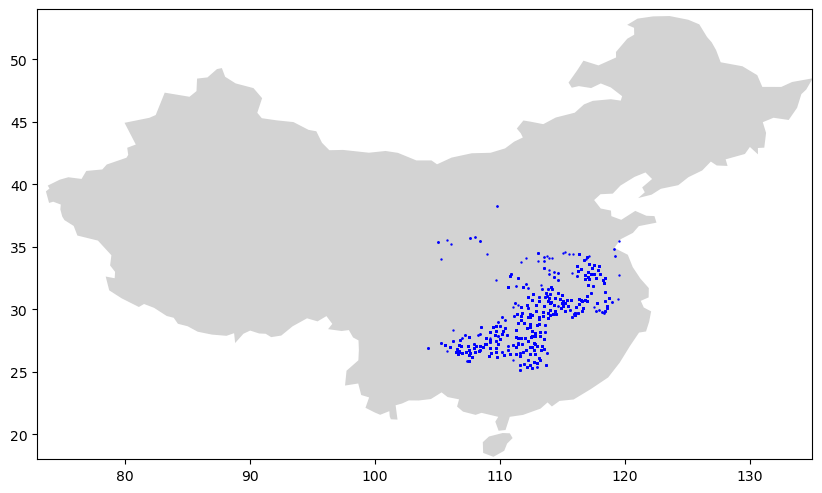

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
china = world[world['name'] == 'China']

min_lat, max_lat = 18, 54    # 中国的纬度范围
min_lon, max_lon = 73, 135   # 中国的经度范围

geometry = [Point(xy) for xy in zip(df['Lon'], df['Lat'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

ax = china.plot(figsize=(10, 6), color='lightgray')

gdf.plot(ax=ax, color='blue', marker='o', markersize=0.5)

plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

plt.show()


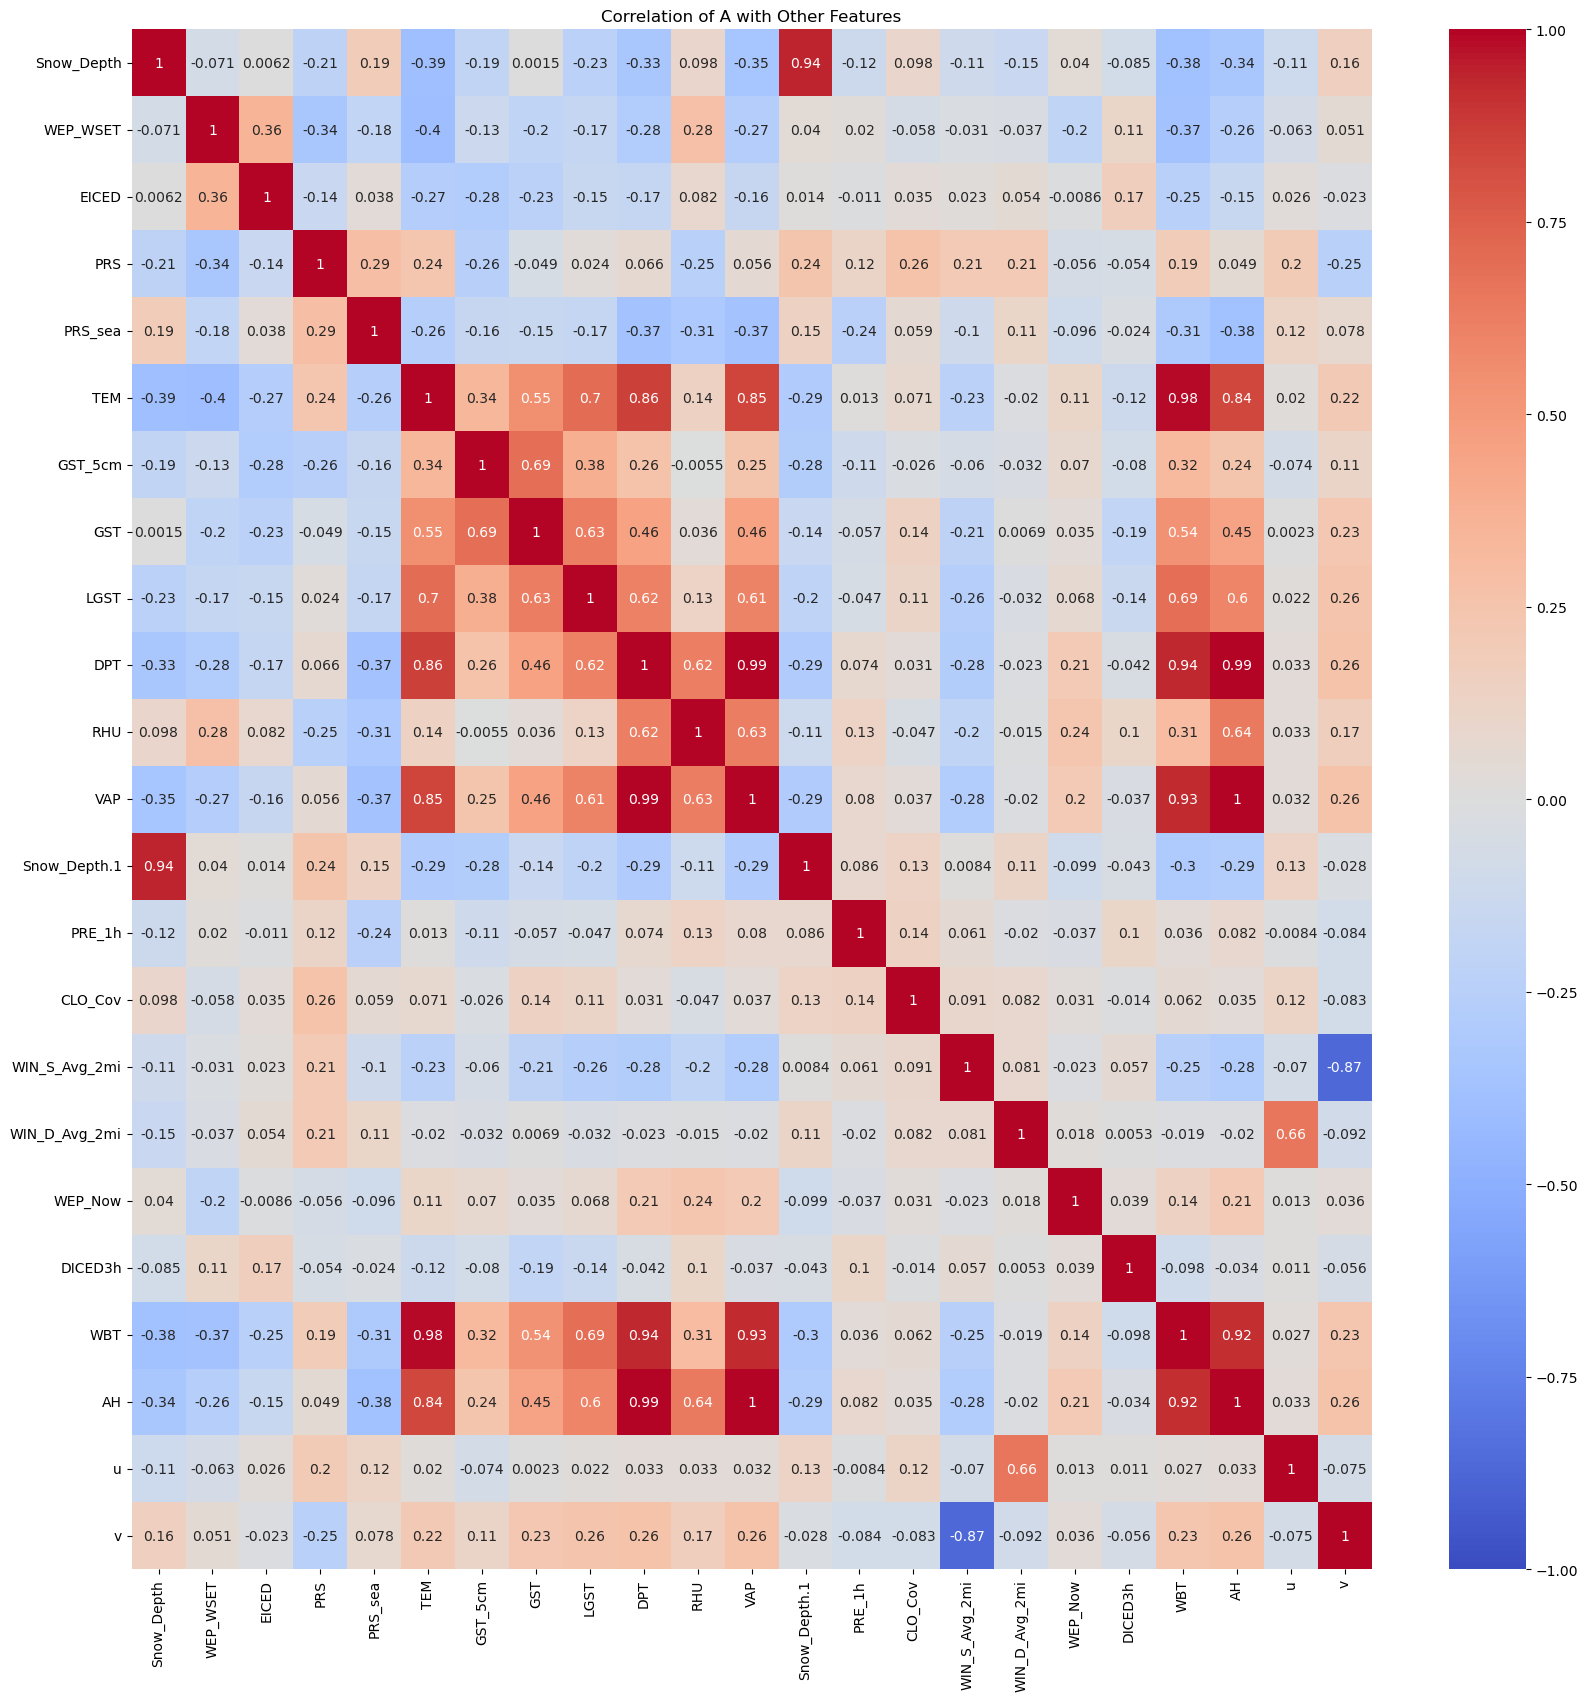

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df[['Snow_Depth', 'WEP_WSET', 'EICED', 'PRS', 'PRS_sea','TEM', 'GST_5cm', 'GST',
       'LGST', 'DPT', 'RHU', 'VAP', 'Snow_Depth.1', 'PRE_1h', 'CLO_Cov', 'WIN_S_Avg_2mi', 
       'WIN_D_Avg_2mi', 'WEP_Now', 'DICED3h', 'WBT', 'AH', 'u', 'v']]
# 计算相关性矩阵
correlation_matrix = corr_df.corr()
# correlation_with_A = correlation_matrix[['EICED']].drop('EICED')  # 删除 'A' 与自己的相关性

# 绘制相关性热力图
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of A with Other Features')
plt.show()